In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px

In [2]:
#Reading data from csv file provided
df = pd.read_csv("singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv")

In [3]:
#Since data in level_1 and level_2 is not ideal for analysis we are breaking down the data to help us with better analysis.
#level_1 is divided into Gender and Ethinicity Columns(Excuse me for the spelling error)
#level_2 is written in better format in age_group
#After which we dropped the level_1 and Level_2 coloumns since we have no use of them 
df['Gender'] = np.where(df['level_1'].str.contains('Male'),"Male",
                       np.where(df['level_1'].str.contains('Female'),"Female","Mixed"))
df['Ethinicity'] = np.where(df['level_1'].str.contains('Chinese'),"Chinese",
                           np.where(df['level_1'].str.contains('Indians'),"Indians",
                                   np.where(df['level_1'].str.contains('Malays'),"Malays",
                                           np.where(df['level_1'].str.contains('Ethnic'),"Other Ethinic","Mixed"))))
df['age_group'] = np.where(df['level_2'].str.contains('0  -  4 Years'),"0-4",
                          np.where(df['level_2'].str.contains('5  -  9 Years'),"5-9",
                          np.where(df['level_2'].str.contains('10 - 14 Years'),"10-14",
                          np.where(df['level_2'].str.contains('15 - 19 Years'),"15-19",
                          np.where(df['level_2'].str.contains('20 - 24 Years'),"20-24",
                          np.where(df['level_2'].str.contains('25 - 29 Years'),"25-29",
                          np.where(df['level_2'].str.contains('30 - 34 Years'),"30-34",
                          np.where(df['level_2'].str.contains('35 - 39 Years'),"35-39",
                          np.where(df['level_2'].str.contains('40 - 44 Years'),"40-44",
                          np.where(df['level_2'].str.contains('45 - 49 Years'),"45-49",
                          np.where(df['level_2'].str.contains('50 - 54 Years'),"50-54",
                          np.where(df['level_2'].str.contains('55 - 59 Years'),"55-59",
                          np.where(df['level_2'].str.contains('60 - 64 Years'),"60-64",
                          np.where(df['level_2'].str.contains('65 - 69 Years'),"65-69",
                          np.where(df['level_2'].str.contains('70 - 74 Years'),"70-74", #datamissing
                          np.where(df['level_2'].str.contains('75 - 79 Years'),"75-79", #datamissing
                          np.where(df['level_2'].str.contains('80 - 84 Years'),"80-84", #datamissing
                          np.where(df['level_2'].str.contains('65 Years & Over'),">65",
                          np.where(df['level_2'].str.contains('70 Years & Over'),">70",
                          np.where(df['level_2'].str.contains('75 Years & Over'),">75", #datamissing
                          np.where(df['level_2'].str.contains('80 Years & Over'),">80", #datamissing
                          np.where(df['level_2'].str.contains('85 Years & Over'),">85",23)))))))))))))))))))))) #datamissing
df.drop(['level_1','level_2'],axis=1,inplace = True)

In [4]:
#Here missing values are represented by string(na) 
#We replaced then with np.nan and converted values to float type since np.nan is float type
df[df['value']=="na"]
df['value'] = df['value'].replace(to_replace='na',value=np.nan)
df['value']=df['value'].astype('float')
df[df.isnull().any(axis=1)]

,year,value,Gender,Ethinicity,age_group
344,1958,NaN,Mixed,Mixed,70-74
345,1958,NaN,Mixed,Mixed,75-79
346,1958,NaN,Mixed,Mixed,80-84
349,1958,NaN,Mixed,Mixed,>75
350,1958,NaN,Mixed,Mixed,>80
...,...,...,...,...,...
10867,1989,NaN,Male,Other Ethinic,>85
10883,1989,NaN,Female,Other Ethinic,75-79
10884,1989,NaN,Female,Other Ethinic,80-84
10888,1989,NaN,Female,Other Ethinic,>80


In [5]:
year_list = df['year'].unique()
year_list

array([1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [6]:
#Assigning year_n_list with a list of years with null values
year_n_list=df[df.isnull().any(axis=1)]['year'].unique()
year_n_list

array([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989])

In [7]:
#Assigning ethnicity_list with a list of ethnicity with null values
ethnicity_list = df[df.isnull().any(axis=1)]['Ethinicity'].unique()
ethnicity_list

array(['Mixed', 'Malays', 'Chinese', 'Indians', 'Other Ethinic'],
      dtype=object)

In [8]:
#Assigning gender_list with a list of gender with null values
gender_list = df[df.isnull().any(axis=1)]['Gender'].unique()
gender_list

array(['Mixed', 'Male', 'Female'], dtype=object)

In [9]:
#Assigning age_group_list with a list of age_group with null values
age_group_list = df[df.isnull().any(axis=1)]['age_group'].unique()
age_group_list

array(['70-74', '75-79', '80-84', '>75', '>80', '>85'], dtype=object)

In [10]:
#Understanding pattern in missing data for different years
for i in year_n_list:
    print(i,len(df[(df.isnull().any(axis=1))][df['year']==i]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



1958 90
1959 90
1960 90
1961 90
1962 90
1963 90
1964 90
1965 90
1966 90
1967 90
1968 90
1969 90
1970 30
1971 90
1972 90
1973 90
1974 90
1975 90
1976 90
1977 90
1978 90
1979 90
1981 60
1982 60
1983 60
1984 60
1985 60
1986 60
1987 60
1988 60
1989 60


In [11]:
"""
From the understanding that there are three different patterns in missing data.
We impute the data in such a manner taking into account the distribution of values from other years with complete data.
This model assumes a sigular distribution based on year.
There will be minor error with the population being filled which would be less that 3% so this is fine. 

"""
for i in year_n_list:
    for n in ethnicity_list:
        for m in gender_list:
            if ((i>=1958 & i<=1969) | (i>=1971 & i<=1979)):
                df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)] = df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][~df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group'].isin([">65",">75",">80"])]
                df2 = df[df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="70-74")].index.astype(int)[0]:df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="70-74")].index.astype(int)[0]+1]
                df2.fillna(value=np.round(float(df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group']==">70"]['value']/2)),inplace = True)
                df2 = df[df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="75-79")].index.astype(int)[0]:df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="75-79")].index.astype(int)[0]+1]
                df2.fillna(value= np.round(float(df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group']==">70"]['value']/4)),inplace=True)
                df2 = df[df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="80-84")].index.astype(int)[0]:df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="80-84")].index.astype(int)[0]+1]
                df2.fillna(value= np.round(float(df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group']==">70"]['value']/8)),inplace=True)
                df2 = df[df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']==">85")].index.astype(int)[0]:df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']==">85")].index.astype(int)[0]+1]
                df2.fillna(value= np.round(float(df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group']==">70"]['value']/8)),inplace=True)
                df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)] = df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][~df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group'].isin([">70"])]

            elif (i>=1981 and i<=1989): 
                df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)] = df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][~df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group'].isin([">65",">70",">80"])]
                df2 = df[df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="75-79")].index.astype(int)[0]:df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="75-79")].index.astype(int)[0]+1]
                df2.fillna(value=np.round(float(df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group']==">75"]['value']/2)),inplace = True)
                df2 = df[df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="80-84")].index.astype(int)[0]:df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="80-84")].index.astype(int)[0]+1]
                df2.fillna(value= np.round(float(df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group']==">75"]['value']/4)),inplace=True)
                df2 = df[df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']==">85")].index.astype(int)[0]:df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']==">85")].index.astype(int)[0]+1]
                df2.fillna(value= np.round(float(df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group']==">75"]['value']/4)),inplace=True)
                df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)] = df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][~df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group'].isin([">75"])]
                
            elif (i==1970):
                df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)] = df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][~df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group'].isin([">65",">70",">75"])]
                df2 = df[df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="80-84")].index.astype(int)[0]:df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']=="80-84")].index.astype(int)[0]+1]
                df2.fillna(value= np.round(float(df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group']==">80"]['value']*2/3)),inplace=True)
                df2 = df[df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']==">85")].index.astype(int)[0]:df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n) & (df['age_group']==">85")].index.astype(int)[0]+1]
                df2.fillna(value= np.round(float(df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group']==">80"]['value']/3)),inplace=True)
                df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)] = df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)][~df[(df['year']==i) & (df['Gender']==m) & (df['Ethinicity']==n)]['age_group'].isin([">80"])]
     

In [12]:
#Dropping rows with all null values and any rows with >65or>70or>75>80
df = df[~df['age_group'].isin(['>65',">70",">75",">80"])]
df.dropna(thresh=4,inplace=True)

In [13]:
#resetting index and drop the previous index
df.reset_index(drop = True,inplace=True)

In [14]:
df

,year,value,Gender,Ethinicity,age_group
0,1957.0,264727.0,Mixed,Mixed,0-4
1,1957.0,218097.0,Mixed,Mixed,5-9
2,1957.0,136280.0,Mixed,Mixed,10-14
3,1957.0,135679.0,Mixed,Mixed,15-19
4,1957.0,119266.0,Mixed,Mixed,20-24
...,...,...,...,...,...
16735,2018.0,1299.0,Female,Other Ethinic,65-69
16736,2018.0,725.0,Female,Other Ethinic,70-74
16737,2018.0,520.0,Female,Other Ethinic,75-79
16738,2018.0,405.0,Female,Other Ethinic,80-84


In [15]:
#list of age_groups
age_list = df['age_group'].unique()
age_list

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '>85'], dtype=object)

In [16]:
#As of 2018, Chinese is the largest ethnic group in singapore
df3 = df[(df['year']==2018)&(df['Gender']=="Mixed")].groupby('Ethinicity')['value'].sum()
df3 = pd.Series(df3)
df3

Ethinicity
Chinese          2969281.0
Indians           360528.0
Malays            535824.0
Mixed            3994283.0
Other Ethinic     128650.0
Name: value, dtype: float64

In [17]:
#converting df3 to dataframe
df3 = df3.to_frame()

Text(0.5, 0, 'Ethinic Group')

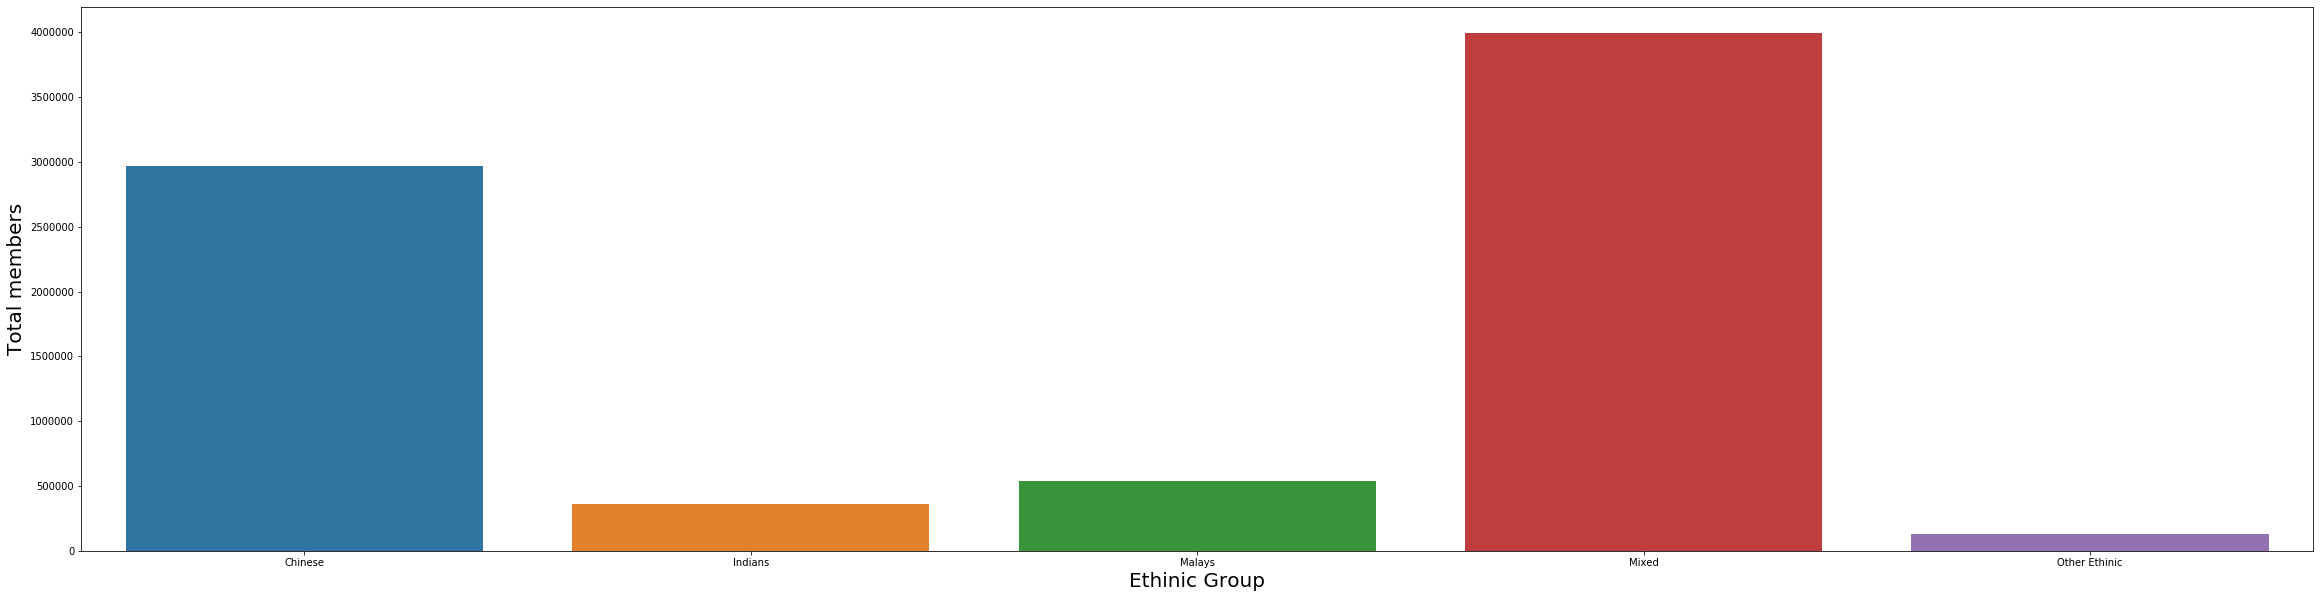

In [18]:
#Plotting the values for visualisation
plt.figure(figsize=(40,10))
bar_level1 = sns.barplot(x=df3.index,y='value',data=df3)
bar_level1.set_ylabel("Total members",fontsize=20)
bar_level1.set_xlabel("Ethinic Group",fontsize=20)

In [19]:
#new dataframe with ethnicty and average growth
df_growth = pd.DataFrame(columns=['Ethinicity','Average_growth'])

In [20]:
#determining average population growth for each ethnicity 
for n in ethnicity_list:
    x = df[(df['Gender']=="Mixed")&(df['Ethinicity']==n)].groupby('year').sum().diff().dropna().mean()[0]
    df_growth = df_growth.append({'Ethinicity':n,'Average_growth':x},ignore_index=True)

In [21]:
#chinese have a average growth of 41776 per year over the past 62 years 
#while other ethinicities have comparatively lower growth rate 
df_growth

,Ethinicity,Average_growth
0,Mixed,41776.295082
1,Malays,5553.524590
2,Chinese,30798.114754
3,Indians,3876.131148
4,Other Ethinic,1548.524590


Text(0.5, 0, 'Ethinic Group')

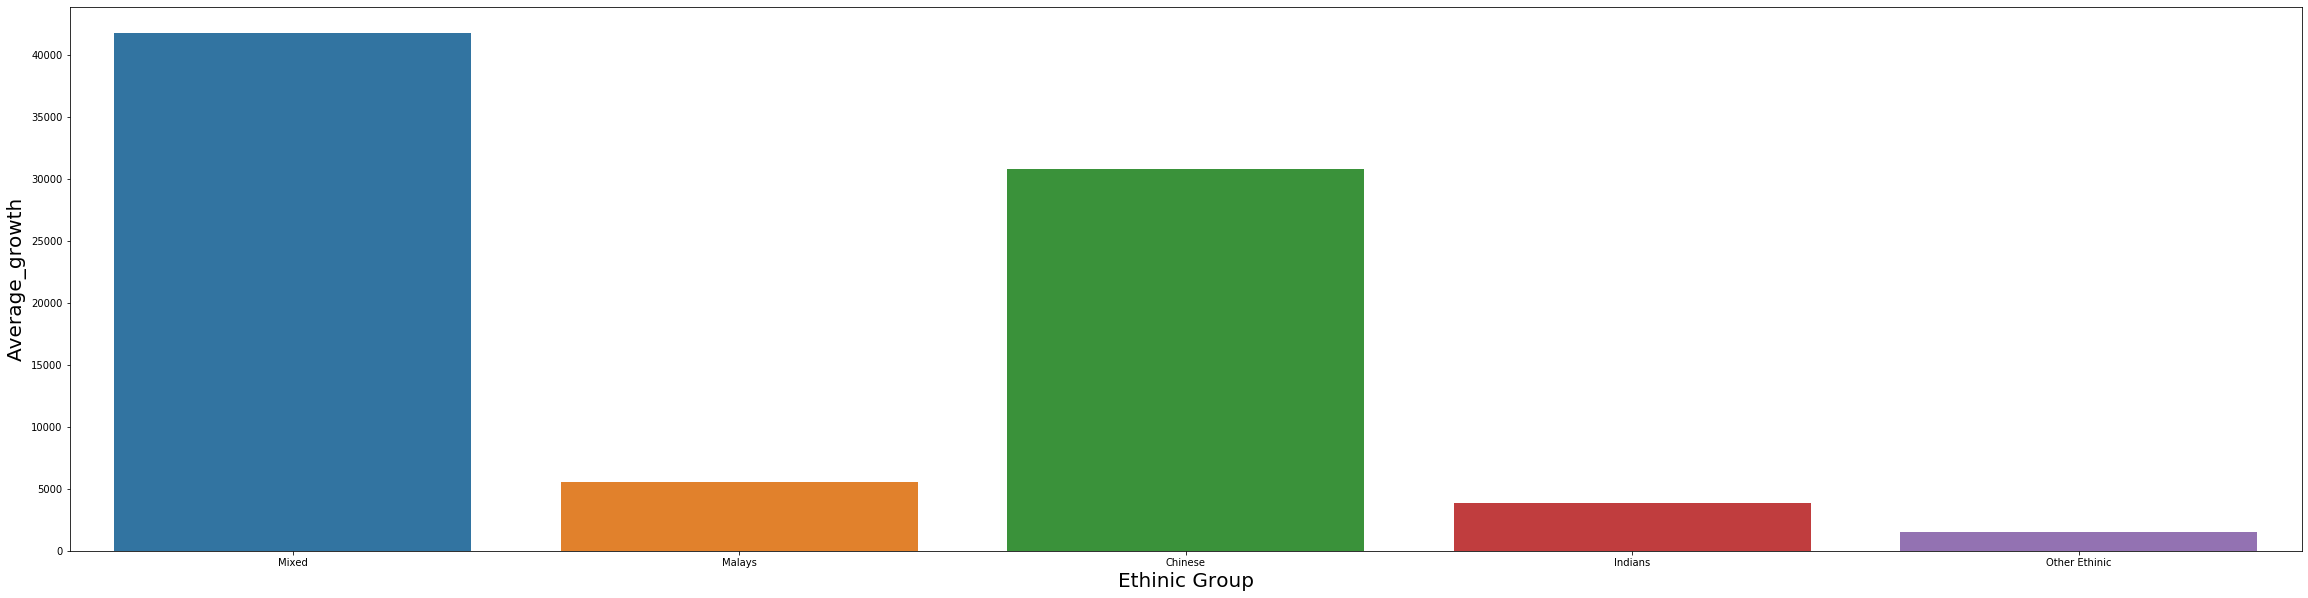

In [22]:
#Plotting the values for visualisation
plt.figure(figsize=(40,10))
bar_level1 = sns.barplot(x='Ethinicity',y='Average_growth',data=df_growth)
bar_level1.set_ylabel("Average_growth",fontsize=20)
bar_level1.set_xlabel("Ethinic Group",fontsize=20)

In [23]:
#new dataframe with year, ethinicity and perentage of peopulation in that year
df_percent_of_population = pd.DataFrame(columns=['year','Ethinicity','Percent'])

In [24]:
#determing percentage of population for each ethnicity for each year
for i in year_list:
    for n in ethnicity_list[1:]:
        p = (df[(df['year']==i)&(df['Ethinicity']==n)&(df['Gender']=="Mixed")]['value'].sum())*100/(df[(df['year']==i)&(df['Ethinicity']=="Mixed")&(df['Gender']=="Mixed")]['value'].sum())
        df_percent_of_population = df_percent_of_population.append({'year':i,'Ethinicity':n,'Percent':p},ignore_index=True)
    


In [25]:
#As of 2018 Chinese constitute 74.33% of total population.
#While having an average percentage of 76.37 over the past 62 years
df_percent_of_population[df_percent_of_population['Ethinicity']=="Chinese"]

,year,Ethinicity,Percent
1,1957,Chinese,75.425280
5,1958,Chinese,75.684685
9,1959,Chinese,75.913511
13,1960,Chinese,76.020362
17,1961,Chinese,76.069079
...,...,...,...
229,2014,Chinese,74.259205
233,2015,Chinese,74.307900
237,2016,Chinese,74.313669
241,2017,Chinese,74.341998


In [26]:
df_percent_of_population[df_percent_of_population['Ethinicity']=="Chinese"]['Percent'].mean()

76.37423118894455

In [27]:
#dropping mixed in ethinicity for simplicity of analysis
df_age = df.drop(df[df['Ethinicity'] == 'Mixed'].index)

In [28]:
df_age

,year,value,Gender,Ethinicity,age_group
54,1957.0,43161.0,Mixed,Malays,0-4
55,1957.0,29135.0,Mixed,Malays,5-9
56,1957.0,16614.0,Mixed,Malays,10-14
57,1957.0,17575.0,Mixed,Malays,15-19
58,1957.0,20473.0,Mixed,Malays,20-24
...,...,...,...,...,...
16735,2018.0,1299.0,Female,Other Ethinic,65-69
16736,2018.0,725.0,Female,Other Ethinic,70-74
16737,2018.0,520.0,Female,Other Ethinic,75-79
16738,2018.0,405.0,Female,Other Ethinic,80-84


In [29]:
#As of 2018, 50-54 is the most prominent age group in singapore
df_age_2018 = df_age[(df_age['year']==2018)&(df_age['Gender']=="Mixed")].groupby('age_group')['value'].sum()
df_age_2018 = pd.Series(df_age_2018)
df_age_2018 = df_age_2018.to_frame()
df_age_2018.sort_values(by='value')

,value
age_group,
>85,49777.0
80-84,57103.0
75-79,93327.0
70-74,135546.0
0-4,185528.0
5-9,199066.0
10-14,206530.0
65-69,212101.0
15-19,226520.0


In [30]:
#dataframe for avg population growth for each age group
df_avg_ag_growth = pd.DataFrame(columns=['age_group','Average_growth'])

In [31]:
#determining avg population growth for each age group
for a in age_list:
    x = df_age[(df_age['Gender']=="Mixed")&(df_age['age_group']==a)].groupby('year').sum().diff().dropna().mean()[0]
    df_avg_ag_growth = df_avg_ag_growth.append({'age_group':a,'Average_growth':x},ignore_index=True)

In [32]:
#average growth of all age group over the past 62 years. For 50-54 the average growth is 4215.
df_avg_ag_growth

,age_group,Average_growth
0,0-4,-1298.344262
1,5-9,-311.983607
2,10-14,1151.639344
3,15-19,1489.196721
4,20-24,2233.606557
5,25-29,2949.262295
6,30-34,3138.885246
7,35-39,3623.131148
8,40-44,3728.245902
9,45-49,3952.819672


Text(0.5, 0, 'Age_Group')

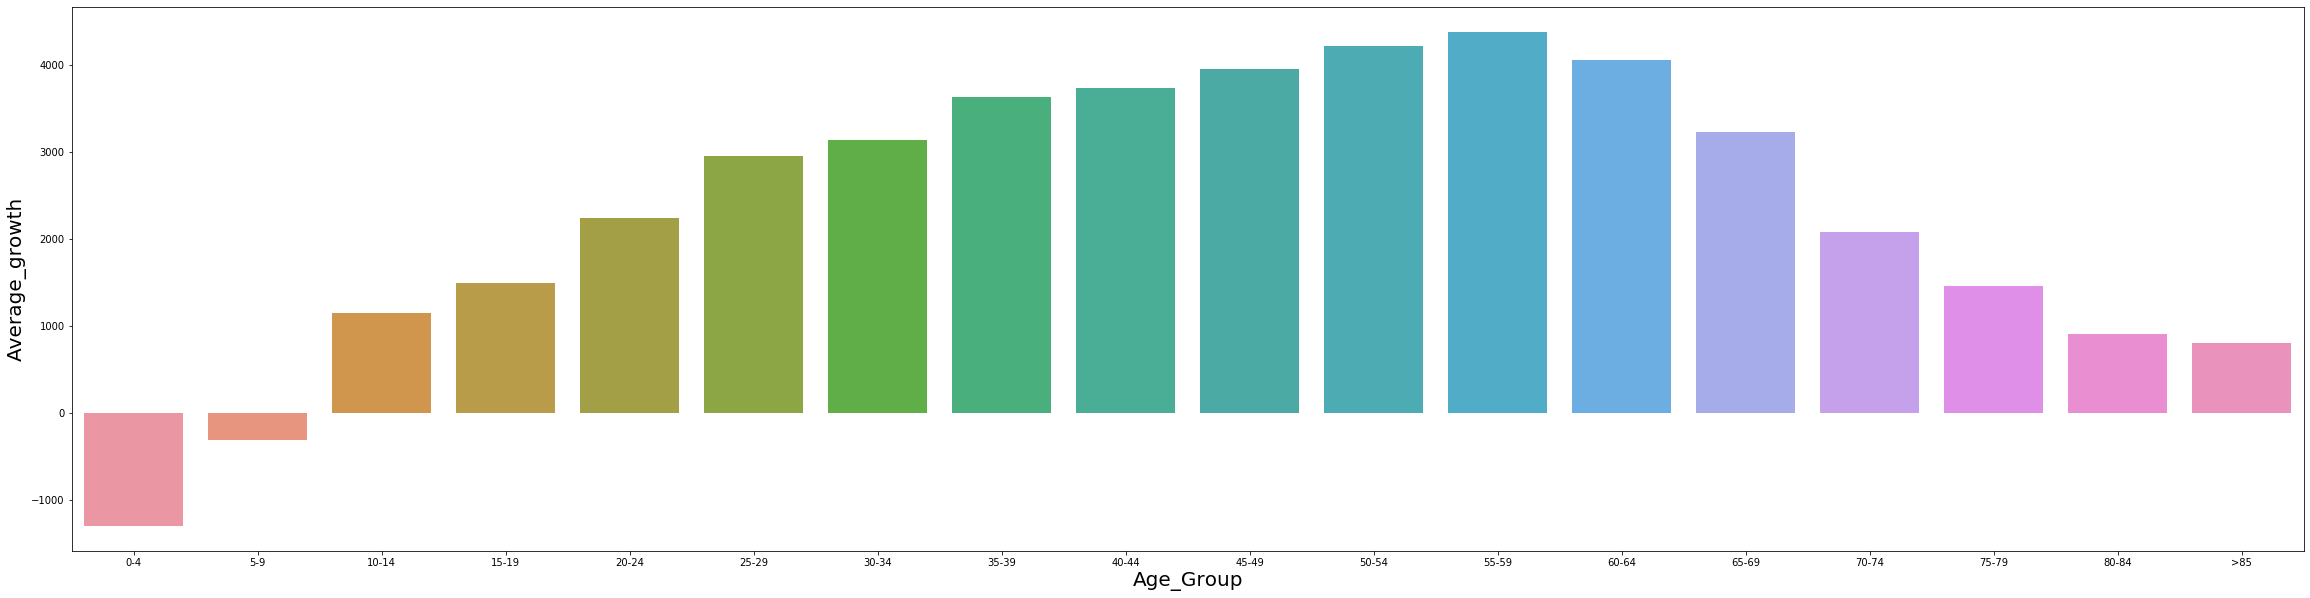

In [33]:
#avearge growth of 55-59 is the highest. 
#Where as negative growth rate in children(0-5) which suggest dip in birth rate
plt.figure(figsize=(40,10))
bar_level1 = sns.barplot(x='age_group',y='Average_growth',data=df_avg_ag_growth)
bar_level1.set_ylabel("Average_growth",fontsize=20)
bar_level1.set_xlabel("Age_Group",fontsize=20)

In [34]:
#new dataframe with year, age_group and perentage of peopulation in that year
df_percent_of_population_by_ag = pd.DataFrame(columns=['year','age_group','Percent'])

In [35]:
#determing % of population by age group for each year
for i in year_list:
    for a in age_list:
        p = (df_age[(df_age['year']==i)&(df_age['age_group']==a)&(df_age['Gender']=="Mixed")]['value'].sum())*100/(df_age[(df_age['year']==i)&(df_age['Gender']=="Mixed")]['value'].sum())
        df_percent_of_population_by_ag = df_percent_of_population_by_ag.append({'year':i,'age_group':a,'Percent':p},ignore_index=True)
        


In [36]:
#As of 2018, 50-54 constitute 7.73% of total population 
df_percent_of_population_by_ag[(df_percent_of_population_by_ag['age_group']=='50-54')&(df_percent_of_population_by_ag['year']==2018)]


,year,age_group,Percent
1108,2018,50-54,7.735181


In [37]:
df_percent_of_population_by_ag

,year,age_group,Percent
0,1957,0-4,18.308437
1,1957,5-9,15.083521
2,1957,10-14,9.425082
3,1957,15-19,9.383517
4,1957,20-24,8.248399
...,...,...,...
1111,2018,65-69,5.310114
1112,2018,70-74,3.393500
1113,2018,75-79,2.336514
1114,2018,80-84,1.429618


In [38]:
#new dataframe with age_group and growth rate
df_age_growth_rate = pd.DataFrame(columns=['age_group','growth rate'])

In [39]:
#determining growth rate of age group in 62 years
for a in age_list:
    gr = (int(df[(df['year']==2018)&(df['Gender']=="Mixed")&(df['Ethinicity']=="Mixed")&(df['age_group']==a)]['value'])-int(df[(df['year']==1957)&(df['Gender']=="Mixed")&(df['Ethinicity']=="Mixed")&(df['age_group']==a)]['value']))*100/(int(df[(df['year']==1957)&(df['Gender']=="Mixed")&(df['Ethinicity']=="Mixed")&(df['age_group']==a)]['value']))
    df_age_growth_rate = df_age_growth_rate.append({'age_group':a,'growth rate':gr},ignore_index=True)
    

In [40]:
#As expected it is older ages with highest growth rate from 1957 to 2020 
#While 0-4 is showing negative growth rate
#It is 20-24 that remained almost same over the past 62 years
df_age_growth_rate.sort_values(by='growth rate')

,age_group,growth rate
0,0-4,-29.917235
1,5-9,-8.725934
2,10-14,51.548283
3,15-19,66.952881
4,20-24,114.240437
5,25-29,161.023397
6,30-34,212.924103
7,35-39,267.215176
8,40-44,298.388811
9,45-49,361.415552


In [41]:
#new dataframe with ethnicity and growth rate
df_ethnicity_growth_rate = pd.DataFrame(columns=['Ethinicity','growth rate'])

In [42]:
#determining growth rate of ethnicity in 62 years
for n in ethnicity_list[1:]:
    gr = (((int(df[(df['year']==2018)&(df['Ethinicity']==n)&(df['Gender']=="Mixed")]['value'].sum())-int(df[(df['year']==1957)&(df['Ethinicity']==n)&(df['Gender']=="Mixed")]['value'].sum()))*100/int(df[(df['year']==1957)&(df['Ethinicity']==n)&(df['Gender']=="Mixed")]['value'].sum())))
    df_ethnicity_growth_rate = df_ethnicity_growth_rate.append({'Ethinicity':n,'growth rate':gr},ignore_index=True)
    

In [43]:
#Other Ethinics has higest growth rate. This can be seen as increase in diversity
#While Malays growth is the least of all 
#All Ethnicities have grown. None of them have remained same over the past 62 years
df_ethnicity_growth_rate

,Ethinicity,growth rate
0,Malays,171.910443
1,Chinese,172.262231
2,Indians,190.551562
3,Other Ethinic,276.279614


In [44]:
#new dataframe with gender and growth rate
df_gender_growth_rate = pd.DataFrame(columns=['Gender','growth rate'])

In [45]:
#determining growth rate of gender in 62 years
for m in gender_list[1:]:
    gr= (int(df[(df['year']==2018)&(df['Ethinicity']=='Mixed')&(df['Gender']==m)]['value'].sum())-int(df[(df['year']==1957)&(df['Ethinicity']=='Mixed')&(df['Gender']==m)]['value'].sum()))*100/int(df[(df['year']==1957)&(df['Ethinicity']=='Mixed')&(df['Gender']==m)]['value'].sum())
    df_gender_growth_rate = df_gender_growth_rate.append({'Gender':m,'growth rate':gr},ignore_index=True)
    
    

In [46]:
#Females have the highest growth rate
#Males have the least growth rate
df_gender_growth_rate

,Gender,growth rate
0,Male,156.415911
1,Female,198.380781


In [47]:
#new datframe with year, ethnicity and population
df_year = pd.DataFrame(columns=['year','Ethinicity','Population'])

In [48]:
#determining population by ethinicity in each year
for i in year_list:
    for n in ethnicity_list:
        pop = df[(df['year']==i)&(df['Gender']=='Mixed')&(df['Ethinicity']==n)]['value'].sum()
        df_year = df_year.append({'year':i,'Ethinicity':n,'Population':pop},ignore_index=True)

In [49]:
df_year

,year,Ethinicity,Population
0,1957,Mixed,1445929.0
1,1957,Malays,197059.0
2,1957,Chinese,1090596.0
3,1957,Indians,124084.0
4,1957,Other Ethinic,34190.0
...,...,...,...
305,2018,Mixed,3994283.0
306,2018,Malays,535824.0
307,2018,Chinese,2969281.0
308,2018,Indians,360528.0


In [50]:
fig = px.line(df_year, x="year", y="Population", color='Ethinicity')

In [51]:
#While chinese ethnicity have been increasing exponentially over the years, other ethinic groups more or less remained the same
fig.show()

In [52]:
#new datframe with year, age_group and population
df_year_ag = pd.DataFrame(columns=['year','age_group','Population'])

In [53]:
#determining population by age_group in each year
for i in year_list:
    for m in age_list:
        pop = df_age[(df_age['year']==i)&(df_age['Gender']=='Mixed')&(df_age['age_group']==m)]['value'].sum()
        df_year_ag = df_year_ag.append({'year':i,'age_group':m,'Population':pop},ignore_index=True)

In [54]:
df_year_ag

,year,age_group,Population
0,1957,0-4,264727.0
1,1957,5-9,218097.0
2,1957,10-14,136280.0
3,1957,15-19,135679.0
4,1957,20-24,119266.0
...,...,...,...
1111,2018,65-69,212101.0
1112,2018,70-74,135546.0
1113,2018,75-79,93327.0
1114,2018,80-84,57103.0


In [55]:
#We can see that major population growth in singapore happened during 1990 
#Which explains its new found status in 1990 as one of the world's most prosperous nations, with a highly developed free market economy, strong international trading links
#Also while singapore population is increasing we can see dip in child population in the recent years
fig2 = px.line(df_year_ag, x="year", y="Population", color='age_group')
fig2.show()

In [56]:
#new datframe with year, Gender and population
df_year_g = pd.DataFrame(columns=['year','Gender','Population'])

In [57]:
#determining population by Gender in each year
for i in year_list:
    for g in gender_list:
        pop = df[(df['year']==i)&(df['Ethinicity']=='Mixed')&(df['Gender']==g)]['value'].sum()
        df_year_g = df_year_g.append({'year':i,'Gender':g,'Population':pop},ignore_index=True)

In [58]:
df_year_g

,year,Gender,Population
0,1957,Mixed,1445929.0
1,1957,Male,762760.0
2,1957,Female,683169.0
3,1958,Mixed,1518800.0
4,1958,Male,797601.0
...,...,...,...
181,2017,Male,1943545.0
182,2017,Female,2022251.0
183,2018,Mixed,3994283.0
184,2018,Male,1955838.0


In [61]:
#While there was higher percentage of males in the early years. Females became prominent gender by 1999
#the gap has been increasing ever since
fig3 = px.line(df_year_g, x="year", y="Population", color='Gender')
fig3.show()

In [60]:
##Thank you##